In [172]:
from numpy import *
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import sympy
from sympy.physics.wigner import wigner_6j,wigner_3j,clebsch_gordan
import time

from physconsts import *
from rbconsts import *
from amophys import cc

In [199]:
#### functions 

def derivs(y0,t,O1,O2,D1,D2):
    """ Returns RHS of optical bloch eqs for current values at time t"""
    r11,r12,r13,r22,r23,r33 = y0
#     O1,2; D1,2= params # Rabi freq, detuning
    
    # time derivatives of density op elements; non-redundant eqs only
    dr11 = .5*1j*O1*(cc(r12) - r12)
    dr12 = -.5*1j*(O1*r11 + 2*D1*r12 + O2*r13 - O1*r22)
    dr13 = -.5*1j*(O2*r12 + 2*(D1 + D2)*r13 - O1*r23)
    dr22 = .5*1j*(-O1*cc(r12) + O2*cc(r23) + O1*r12 - O2*r23)
    dr23 = .5*1j*(O1*r13 - O2*r22 - 2*D2*r23 + O2*r33)
    dr33 = .5*1j*O2*(r23 - cc(r23))
    
    return array([dr11,dr12,dr13,dr22,dr23,dr33])

#     rgg,ree,reg = y0
# #     O,D,t1,t2 = params # Rabi freq,detuning,lifetime,coherence
#     O = O1
#     D = D1
#     t1 = inf
#     # time derivatives of density op elements
#     curl = 1j/2*(O*cc(reg)-cc(O)*reg) 
#     drgg = ree/t1 - curl 
#     dree = -ree/t1 + curl
#     dreg = (1j*D-1/(2*t1))*reg+1j*O/2*(rgg-ree) # = cc(drge)
    
#     return array([drgg,dree,dreg])

In [308]:
#### setup the system
w = 5
t1 = 3
t2 = t1 + 2
O2 = lambda t: exp(-((t-t1)/w)**2/2) # arb units
O1 = lambda t: exp(-((t-t2)/w)**2/2)
D1 = 0 # arb units
D2 = lambda t: -D1 + (O1(t)**2 - O2(t)**2)/4*D1

# adiabatic condition for gaussian pulses: t1-t2/w**2 << 1
abs(t1-t2)/w**2

0.08

In [309]:
dt = 0.05
t_exp = 10 # experiment duration
t = arange(t_exp,step=dt)

y0 = zeros(6, complex)
y0[0] = 1 + 0j # all population in ground state rho11

# func = lambda y,t: derivs(t,y,O1(t),O2(t),D1,D2(t))
func = lambda t,y: derivs(y,t,O1(t),O2(t),D1,D2(t))

In [310]:
soln = solve_ivp(func,[0,t_exp],y0,t_eval=linspace(0,t_exp,50))

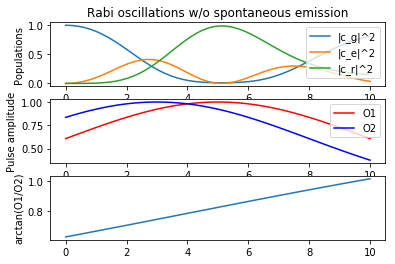

In [316]:
fig, ax = plt.subplots(3,1)

# populations
ax[0].set_title('Rabi oscillations w/o spontaneous emission')
ax[0].set_ylabel('Populations')
for i,l in zip([0,3,5],['|c_g|^2','|c_e|^2','|c_r|^2']):
    ax[0].plot(soln.t,soln.y[i],label=l)
ax[0].legend(loc='upper right')

# rabi frequency
ax[1].set_ylabel('Pulse amplitude')
ax[1].set_xlabel('time [gamma]')
ax[1].plot(soln.t,O1(soln.t),c='r',label='O1')
ax[1].plot(soln.t,O2(soln.t),c='b',label='O2')
ax[1].legend(loc='upper right')

# mixing angle
ax[2].set_ylabel('arctan(O1/O2)')
ax[2].plot(soln.t, arctan(O1(soln.t)/O2(soln.t)))

plt.show()

array([0.7548396 , 0.7832634 , 0.81064459, 0.83680187, 0.86155754,
       0.88473953, 0.90618333, 0.92573398, 0.94324787, 0.95859456,
       0.97165834, 0.98233971, 0.99055664, 0.99624561, 0.99936245,
       0.99988287, 0.99780281, 0.9931385 , 0.98592619, 0.97622177,
       0.96409997, 0.94965344, 0.93299156, 0.91423908, 0.89353454,
       0.87102858, 0.84688212, 0.82126443, 0.79435121, 0.76632254,
       0.73736096, 0.70764945, 0.6773696 , 0.6466998 , 0.61581356,
       0.58487798, 0.55405232, 0.52348687, 0.49332179, 0.46368633,
       0.43469815, 0.40646278, 0.37907337, 0.35261051, 0.32714233,
       0.3027246 , 0.27940115, 0.25720426, 0.23615526, 0.21626517])